<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/Auto_MPG_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [106]:
df = pd.read_csv('/content/auto-mpg.csv')

In [107]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [108]:
df.shape

(398, 9)

In [109]:
df['origin'] = df['origin'].replace({1:'america',2:'europe',3:'japan'})

In [110]:
df = df.drop('car name', axis=1)

In [111]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,america
394,44.0,4,97.0,52,2130,24.6,82,europe
395,32.0,4,135.0,84,2295,11.6,82,america
396,28.0,4,120.0,79,2625,18.6,82,america


In [112]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [113]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [114]:
hpIsDigit = pd.DataFrame(df.horsepower.str.isdigit())

In [115]:
hpIsDigit[hpIsDigit['horsepower']==False]

,horsepower
32,False
126,False
330,False
336,False
354,False
374,False


In [116]:
df[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,america
126,21.0,6,200.0,?,2875,17.0,74,america
330,40.9,4,85.0,?,1835,17.3,80,europe
336,23.6,4,140.0,?,2905,14.3,80,america
354,34.5,4,100.0,?,2320,15.8,81,europe
374,23.0,4,151.0,?,3035,20.5,82,america


In [117]:
df.iloc[32]

mpg                25.0
cylinders             4
displacement       98.0
horsepower            ?
weight             2046
acceleration       19.0
model year           71
origin          america
Name: 32, dtype: object

In [118]:
df = df.replace('?',np.nan)

In [119]:
df[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,america
126,21.0,6,200.0,NaN,2875,17.0,74,america
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,america
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,america


In [120]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [121]:
df.median()

<ipython-input-121-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
dtype: float64

In [122]:
df['horsepower'] = df['horsepower'].fillna(int(df['horsepower'].median()))

In [123]:
df.mean()

<ipython-input-123-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


mpg               23.514573
cylinders          5.454774
displacement     193.425879
weight          2970.424623
acceleration      15.568090
model year        76.010050
dtype: float64

In [124]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [125]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [126]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [127]:
df.median()

<ipython-input-127-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.0
weight          2803.5
acceleration      15.5
model year        76.0
dtype: float64

In [128]:
df['horsepower'] = df['horsepower'].astype('float64')

In [129]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [130]:
df = pd.get_dummies(df,['origin'], drop_first=True)

In [131]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_europe,origin_japan
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0


In [132]:
df_attr = df.iloc[:,0:7]

In [133]:
df_attr.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


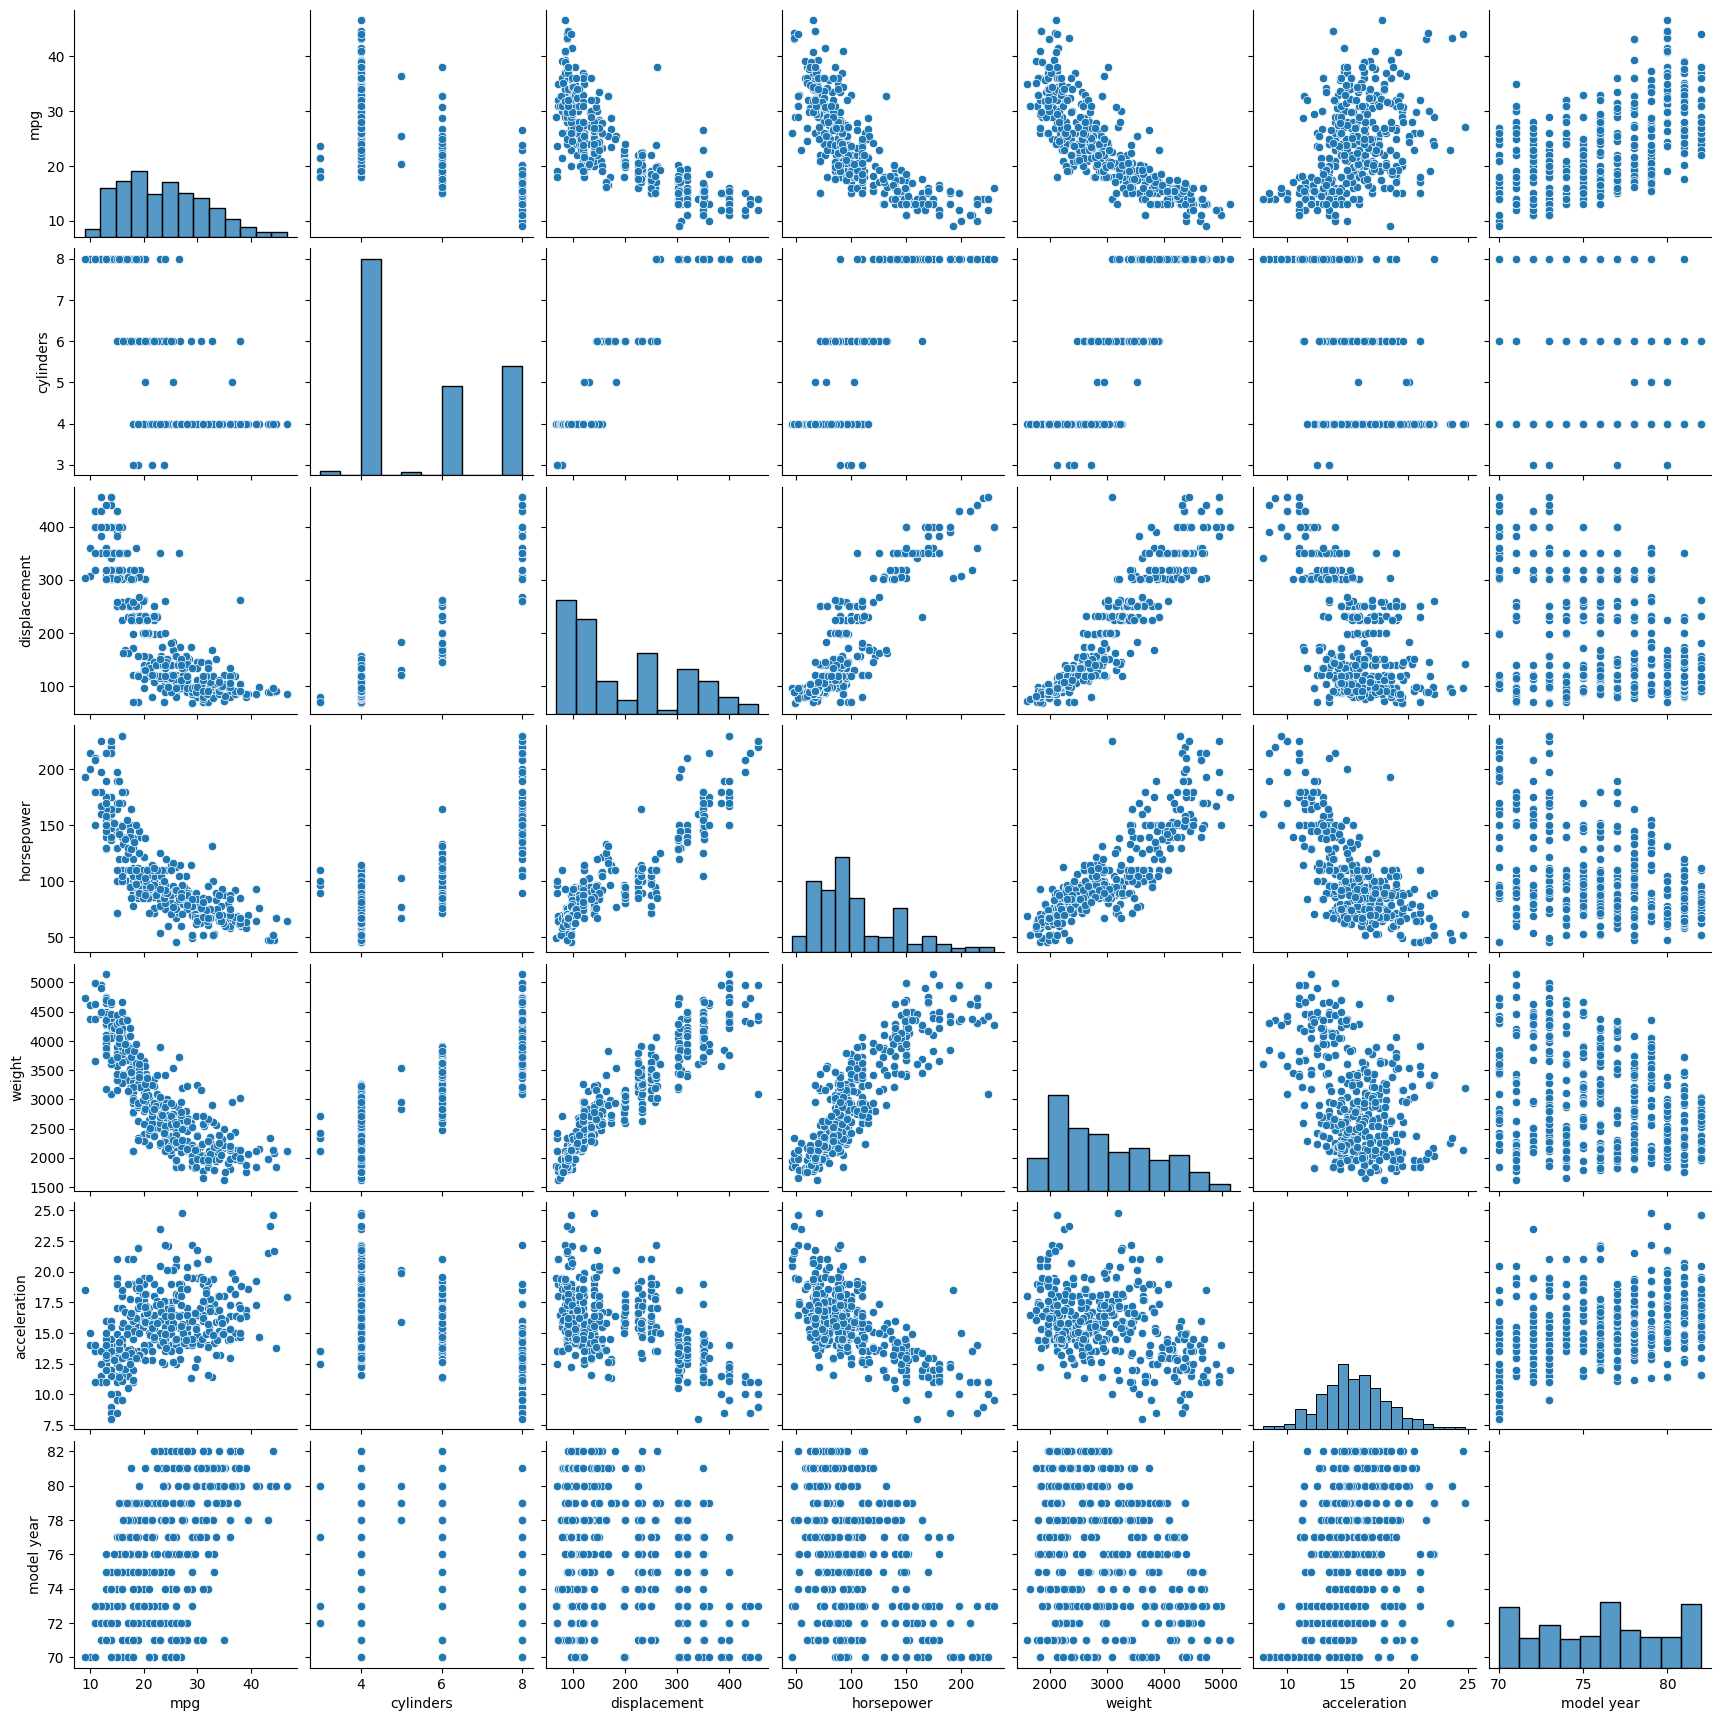

In [134]:
sns.pairplot(df_attr)

In [135]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_europe,origin_japan
mpg,1.000000,-0.775396,-0.804203,-0.773522,-0.831741,0.420289,0.579267,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.841367,0.896017,-0.505419,-0.348746,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.895849,0.932824,-0.543684,-0.370164,-0.373886,-0.433505
horsepower,-0.773522,0.841367,0.895849,1.000000,0.862502,-0.686676,-0.413816,-0.282943,-0.318856
weight,-0.831741,0.896017,0.932824,0.862502,1.000000,-0.417457,-0.306564,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.686676,-0.417457,1.000000,0.288137,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.413816,-0.306564,0.288137,1.000000,-0.024489,0.193101
origin_europe,0.259022,-0.352861,-0.373886,-0.282943,-0.298843,0.204473,-0.024489,1.000000,-0.229895
origin_japan,0.442174,-0.396479,-0.433505,-0.318856,-0.440817,0.109144,0.193101,-0.229895,1.000000


<Axes: >

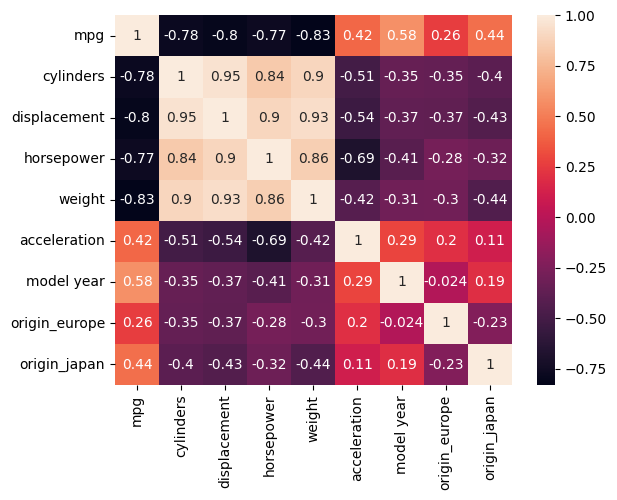

In [136]:
sns.heatmap(df.corr(),annot=True)

In [137]:
y = df['mpg']
X = df.drop('mpg', axis =1)

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
reg_model = LinearRegression()

In [142]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [143]:
reg_model.coef_

array([-0.39474991,  0.02894837, -0.02177415, -0.00735148,  0.0618036 ,
        0.83691196,  3.00171567,  2.39597877])

In [144]:
for idx, col_name in enumerate(X_train.columns):
  print('This is the co-efficient for {} is {}'.format(col_name, reg_model.coef_[idx]))



This is the co-efficient for cylinders is -0.39474990695217776
This is the co-efficient for displacement is 0.028948366562279088
This is the co-efficient for horsepower is -0.021774145887455645
This is the co-efficient for weight is -0.007351482192664363
This is the co-efficient for acceleration is 0.06180359937312851
This is the co-efficient for model year is 0.8369119606164909
This is the co-efficient for origin_europe is 3.0017156747904417
This is the co-efficient for origin_japan is 2.3959787657671865


In [145]:
reg_model.intercept_

-21.281882881732752

In [146]:
predictions = reg_model.predict(X_test)

In [147]:
predictions

array([20.91542258, 27.78599593, 20.35447246, 26.7526978 , 24.34424663,
       15.94634464, 29.616915  , 34.55003642, 17.08533038, 10.56549963,
       30.27126455, 16.46100877, 22.34921174, 27.36788281, 36.49161514,
       23.5241534 , 10.95677527, 20.15979711,  9.06846093, 33.0330679 ,
       25.97739578, 32.32693905, 20.84289899, 25.0852073 , 25.66935588,
       30.00427245, 32.58064503, 32.54624387, 15.13165709, 30.17119275,
       27.18436072, 11.04408036, 21.28305236, 28.68258314, 24.88221335,
       13.63851356, 26.37754026,  9.20966621, 31.69016961, 23.85350641,
       23.89872277, 24.41937422, 21.0536017 , 34.13685878, 25.91796772,
       22.15802502, 21.15535765, 11.67838155, 28.50721367, 19.00192799,
       24.24829534, 26.6275559 , 17.07148691, 12.10418259, 28.33937595,
       24.82799749, 10.32802853, 13.09638819, 30.49803783, 35.81870209,
       36.58556596, 35.86196461, 17.92313356, 27.49833423, 20.67005978,
       33.42282994, 26.59098759, 26.574341  , 29.67311338, 12.34

In [148]:
reg_model.predict(np.array([6,171,97,2984,14.5,75,0,0]).reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20.91542258])

In [149]:
reg_model.score(X_test, y_test)

0.8433220109385648

In [150]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [151]:
MAE = mean_absolute_error(y_test,predictions )

In [152]:
MAE

2.3541760255821194

In [153]:
MSE = mean_squared_error(y_test,predictions )

In [154]:
MSE

9.160482846905563

In [155]:
RMSE = np.sqrt(MAE)